# Supervised Learning: Student Score
# Author: Nikhil Anand

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline

# Preparing Data

In [2]:
url = "/content/student_scores.csv"
data = pd.read_csv(url)

data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


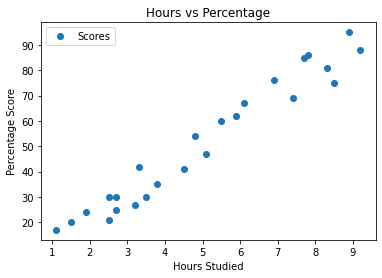

In [3]:
data.plot(x='Hours', y='Scores', style='o')   
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [4]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

# Training Regression Model using Tensorflow

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))

In [9]:
model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 770ms/step - loss: 2807.2451
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 2736.9929
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 2667.6677
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 2599.2842
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 2531.8584
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 2465.4038
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 2399.9341
Epoch 8/1000
1/1 [==============================] - 0s 9ms/step - loss: 2335.4617
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 2271.9988
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 2209.5562
Epoch 11/1000
1/1 [==============================] - 0s 11ms/step - loss: 2148.1438
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 2087.7710
Epoch

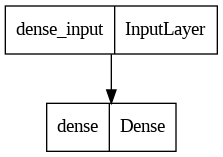

In [10]:
tf.keras.utils.plot_model(model)

In [11]:
x1=0
y1= model.predict([x1])
x2=11
y2= model.predict([x2])

coef= (y1-y2)/(x1-x2)
intercept= y1

1/1 [==============================] - 0s 42ms/step


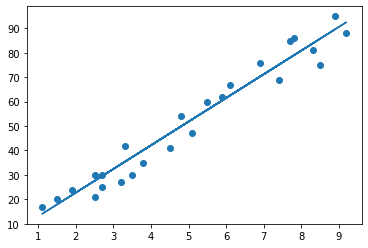

In [12]:
line = coef*X+intercept

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Evaluating Model

In [13]:
y_pred = model.predict(X_test)
display = pd.DataFrame({'Input': X_test.flatten(), 'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
display

1/1 [==============================] - 0s 52ms/step


,Input,Actual,Predicted
0,1.5,20,17.876484
1,3.2,27,34.367535
2,7.4,69,75.110130
3,2.5,30,27.577103
4,5.9,62,60.559204


In [14]:
y_test = y_test.squeeze()
y_pred = y_pred.squeeze()

mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mse = tf.metrics.mean_squared_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}\nMean Squared Error: {mse}")

Mean Absolute Error: 3.892974853515625
Mean Squared Error: 20.813980102539062


# Predicting Result

In [15]:
hours = 9.25
own_pred = model.predict(np.array([hours]).reshape(1, 1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0][0]))

1/1 [==============================] - 0s 24ms/step
No of Hours = 9.25
Predicted Score = 93.0562744140625
